# Support Vector Classifier Implementation

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Create Syntetic Data Points for Binary Classification dataset

In [61]:
from sklearn.datasets import make_classification

# to get clearly separable data points
# X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)

# to get overlapping data points 
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)


In [62]:
X

array([[-0.74032925, -1.04684059],
       [ 1.00977654,  1.16351927],
       [-0.73917328, -0.17846255],
       ...,
       [ 0.44292457, -0.83168207],
       [ 1.31722544, -1.29515328],
       [ 0.9558738 ,  0.41101992]])

In [63]:
y

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,

In [64]:
# convert X input feature to dataframe 
# we get 2 columns - 0th column and 1th column 
pd.DataFrame(X)

,0,1
0,-0.740329,-1.046841
1,1.009777,1.163519
2,-0.739173,-0.178463
3,0.147524,-0.466735
4,1.410146,0.128172
...,...,...
995,1.410265,-3.226546
996,0.763785,-0.929529
997,0.442925,-0.831682
998,1.317225,-1.295153


In [65]:
# get the first column 
pd.DataFrame(X)[0]

0     -0.740329
1      1.009777
2     -0.739173
3      0.147524
4      1.410146
         ...   
995    1.410265
996    0.763785
997    0.442925
998    1.317225
999    0.955874
Name: 0, Length: 1000, dtype: float64

- x = pd.DataFrame(X)[0] and y = pd.DataFrame(X)[1]
- x and y are variables (specifically, they are Pandas Series objects) that store the first and second columns of your data, respectively.

- pd.DataFrame(X): This takes your raw input data X (which is likely a NumPy array or a list of lists representing data points) and converts it into a structured Pandas DataFrame.

- When you pass these to sns.scatterplot():
x=...[0] tells Seaborn to use the data in the 0th column as the X-axis coordinates.
y=...[1] tells Seaborn to use the data in the 1st column as the Y-axis coordinates.


# hue = y is used to represent the output or target variable in your visualization.
Here’s why it is used this way in machine learning visualization:
- Input Features (X-axis/Y-axis): The goal of a scatter plot in this context is usually to visualize how your data points are distributed based on their input features (X). 
- We plot one feature on the X-axis and another feature on the Y-axis to see the physical separation between points.


- Output/Target Variable (hue): The y variable typically holds the labels or classes for each data point (e.g., 0 for "not spam" and 1 for "spam").
The hue parameter in Seaborn tells the library to use this third variable (y) to color-code the points on the plot.

Points where y is 0 might appear blue.
Points where y is 1 might appear orange.
This allows you to visually inspect whether the two input features (X columns 0 and 1) do a good job of separating the different classes defined by y.

<Axes: xlabel='0', ylabel='1'>

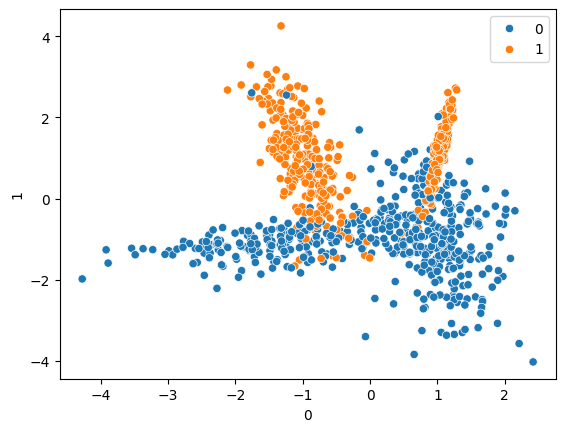

In [66]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue=y)

# Train test split

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a best fit line using Linear SVC Algorithm for the above graph

- when data points are clearly separable use , the kernel attribute of SVC

In [68]:
from sklearn.svm import SVC
svc_obj = SVC(kernel="linear")

In [69]:
# fit on the training and test data 
# & transform only the training data

svc_obj.fit(X_train, y_train)

SVC(kernel='linear')

In [70]:
# Prediction

y_pred = svc_obj.predict(X_test)

# Compute Linear SVC Algo performance

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


# we are getting 99% accuracy - which is very high - reason being the datapoints as seen in the graph were clearly separable, hence high accuracy.
# accuracy drops as the datapoints are overlapping

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       127
           1       0.88      0.93      0.90       123

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[111  16]
 [  9 114]]


# For Overlapping data points in a dataset - 

we can use different types of kernels based on the dataset.
Types of kernels - 
1. RBF kernel
2. Polynomial kernels
3. Sigmoid Kernels

In [72]:
rbf_kernel = SVC(kernel='rbf')
rbf_kernel.fit(X_train, y_train)

SVC()

In [73]:
y_pred = rbf_kernel.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


# accuracy dropped to 98% 
# to make / get more overlapping data points in the dataset -----> increase the value of eg. - n_clusters_per_class = 3, 4 etc...

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       127
           1       0.88      0.96      0.92       123

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[111  16]
 [  5 118]]


# Trying with Polynomial kernel

In [74]:
polynomial_kernel = SVC(kernel='poly')
polynomial_kernel.fit(X_train, y_train)

y_pred = rbf_kernel.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       127
           1       0.88      0.96      0.92       123

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[111  16]
 [  5 118]]


# Trying with Sigmoid Kernel

In [75]:
polynomial_kernel = SVC(kernel='sigmoid')
polynomial_kernel.fit(X_train, y_train)

y_pred3 = rbf_kernel.predict(X_test)

print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       127
           1       0.88      0.96      0.92       123

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[111  16]
 [  5 118]]


After deciding the best kernel ----> we can perform model hyperparameter tuning to improve the accuracy & performance

# Hyperparameter Tuning  & Cross Validation in SVC 

In [76]:
from sklearn.model_selection import GridSearchCV

# defining the parameter range 
param_grid = { 'C':[0.1, 1, 10, 100, 1000] ,
              'gamma':[1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel':['rbf']
              }

Train the gridSearchCV

In [77]:
grid = GridSearchCV(SVC(), param_grid=param_grid, verbose=3, cv = 5, refit=True)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.873 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [78]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

# Predictions on test data

In [79]:
y_pred4 = grid.predict(X_test)

print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       127
           1       0.94      0.97      0.96       123

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[120   7]
 [  4 119]]
